# Handling missing values in numeric columns  
[source](https://www.youtube.com/watch?v=mCL2xLBDw8M&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=36)  

**Univariate** (using the same column to impute its value, be it by any statistical mean)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [5]:
df = pd.read_csv('assets/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [8]:
df.isnull().mean()# 

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [9]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Survived',axis=1),
                                                df['Survived'],
                                                test_size=0.2,
                                                random_state=42)
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [11]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare  = X_train['Fare'].mean()
median_fare  = X_train['Fare'].median()

In [12]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)


In [21]:
X_train[X_train['Age'].isnull()].head(10)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
29,NaN,7.8958,0,29.498846,28.0,7.8958,7.8958
55,NaN,35.5000,0,29.498846,28.0,35.5000,35.5000
533,NaN,22.3583,2,29.498846,28.0,22.3583,22.3583
495,NaN,14.4583,0,29.498846,28.0,14.4583,14.4583
468,NaN,7.7250,0,29.498846,28.0,7.7250,7.7250
409,NaN,25.4667,4,29.498846,28.0,25.4667,25.4667
425,NaN,7.2500,0,29.498846,28.0,7.2500,7.2500
101,NaN,7.8958,0,29.498846,28.0,7.8958,7.8958
298,NaN,30.5000,0,29.498846,28.0,30.5000,30.5000
260,NaN,7.7500,0,29.498846,28.0,7.7500,7.7500


Whenever mean/median imputation is done...the variance shrinks becuase more values are at mean/median now... variance tells how far the values are from the mean.

In [25]:
X_train['Age'].var(),X_train['Age_mean'].var(),X_train['Age_median'].var()

(210.2517072477438, 168.8519336687225, 169.20731007048096)

In [26]:
X_train['Fare'].var(),X_train['Fare_mean'].var(),X_train['Fare_median'].var()# not much changed, becuase there were only 5% missing values in Fare

(2761.031434948639, 2621.2323749512393, 2637.01248167777)

Second thing to check the difference in distribution

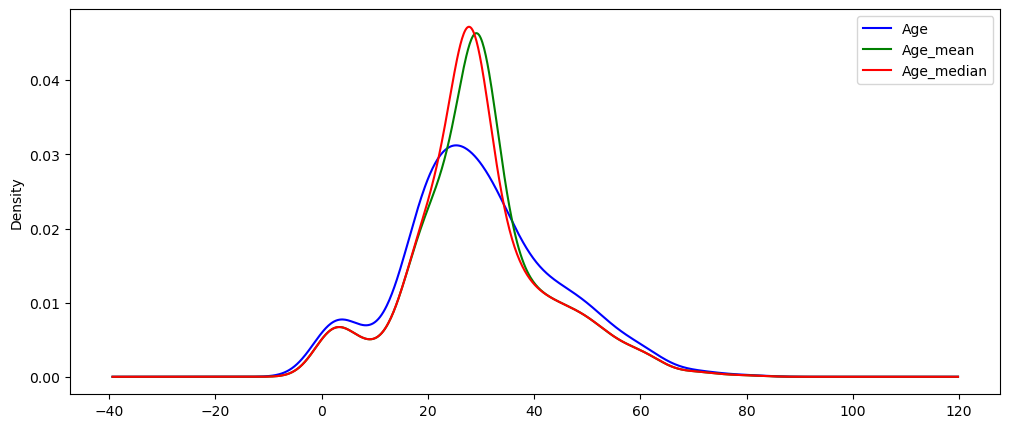

In [31]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax,color='blue')

X_train['Age_mean'].plot(kind='kde',ax=ax,color='green')

X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

lines,labed = ax.get_legend_handles_labels()
ax.legend()

plt.show()

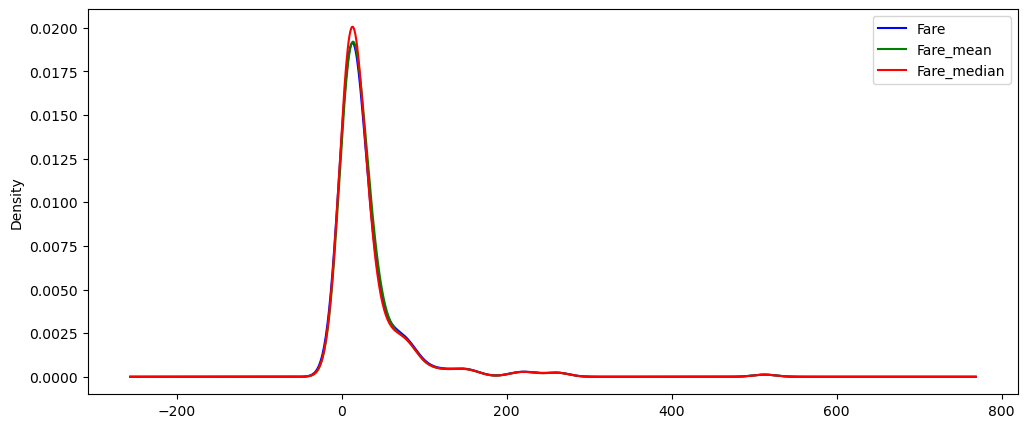

In [32]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax,color='blue')

X_train['Fare_mean'].plot(kind='kde',ax=ax,color='green')

X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

lines,labed = ax.get_legend_handles_labels()
ax.legend()

plt.show()

In [33]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
Fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
Fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [34]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
Fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
Fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


<Axes: >

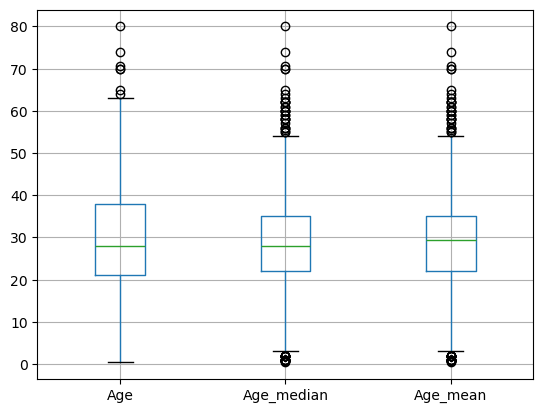

In [35]:
X_train[['Age','Age_median','Age_mean']].boxplot() # mean, median introduced more outliers which are actually not

<Axes: >

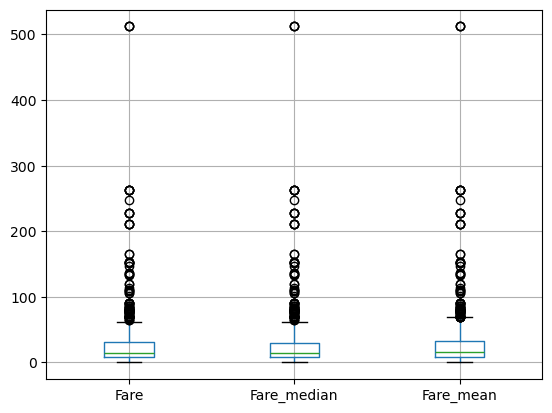

In [37]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot() # remained same

## Using Sklearn

In [38]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Survived',axis=1),
                                                df['Survived'],
                                                test_size=0.2,
                                                random_state=42)
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [2]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')


NameError: name 'SimpleImputer' is not defined

In [40]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [41]:
trf.fit(X_train)

C:\Users\jawwa\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [42]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [43]:
X_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    ,  14.4   ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])